In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
data= pd.read_csv('Titanic-Dataset.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


DATA CLEANING

In [6]:
#check missing values 
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#handle missing data
data['Age']=data['Age'].fillna(data['Age'].median())
print(data['Age'])


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [14]:
#check if the values is fill now or not 
data['Age'].isnull().sum()


np.int64(0)

In [15]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])
print(data['Embarked'])


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object


In [16]:
#check if the values is fill now or not 
data['Embarked'].isnull().sum()


np.int64(0)

In [24]:
data = data.drop('Cabin', axis=1, errors='ignore')
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


SUMMARY STATISTICS


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [27]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


GROUP BASED STATISTICS

In [29]:
data.groupby('Sex')['Survived'].mean()*100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [30]:
data.groupby('Pclass')['Survived'].mean()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

DATA VISUALIZATION 

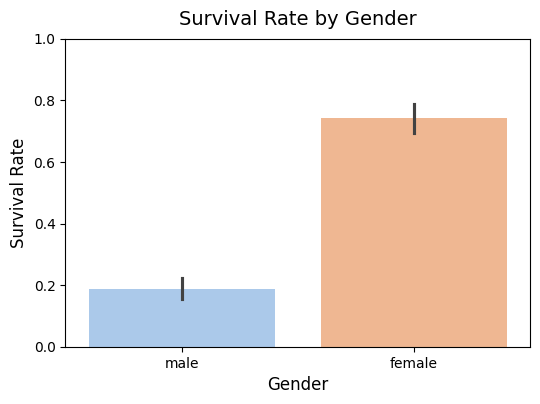

In [45]:
#SURVIVAL BY GENDER
plt.figure(figsize=(6,4))
sns.barplot(x="Sex", y="Survived", hue="Sex", data=data, palette="pastel", legend=False)
plt.title("Survival Rate by Gender", fontsize=14, pad=10)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Survival Rate", fontsize=12)
plt.ylim(0,1)
plt.show()


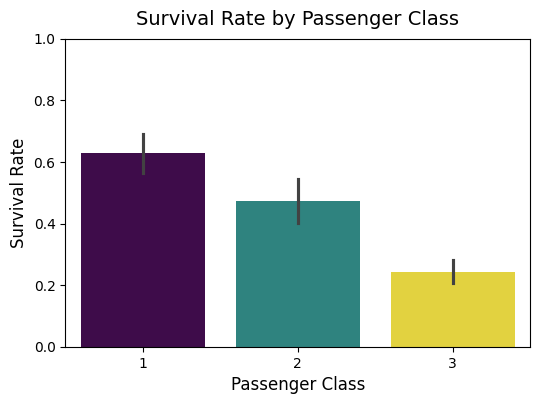

In [46]:
#SURVIVAL BY PCLASS
plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Survived", hue="Pclass", data=data, palette="viridis", legend=False)
plt.title("Survival Rate by Passenger Class", fontsize=14, pad=10)
plt.xlabel("Passenger Class", fontsize=12)
plt.ylabel("Survival Rate", fontsize=12)
plt.ylim(0,1)
plt.show()


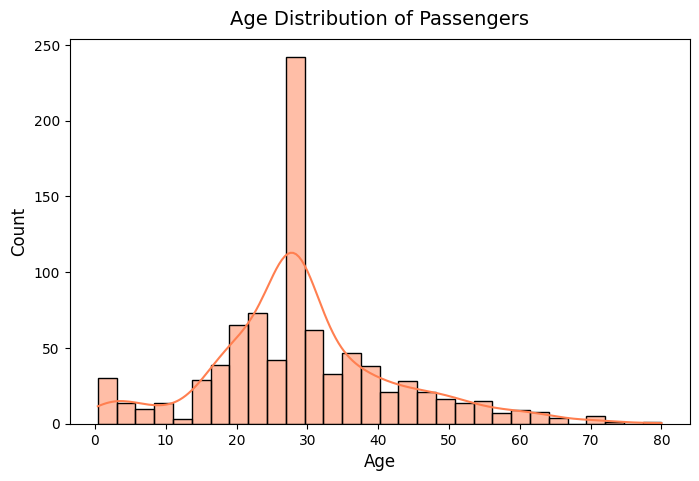

In [47]:
#AGE DISTRIBUTION
plt.figure(figsize=(8,5))
sns.histplot(data['Age'], kde=True, bins=30, color="coral")
plt.title("Age Distribution of Passengers", fontsize=14, pad=10)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()



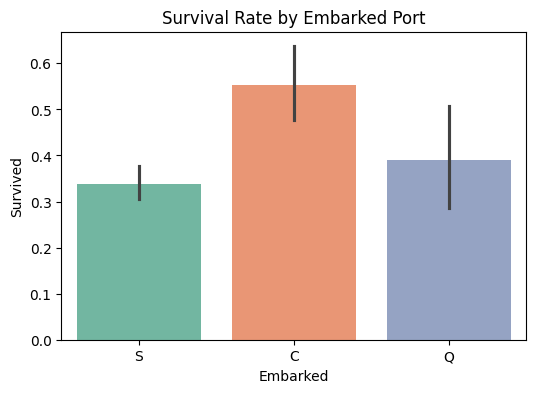

In [42]:
#  Barplot: Survival by Embarked Port 
plt.figure(figsize=(6,4))
sns.barplot(x="Embarked", y="Survived", hue="Embarked", data=data, palette="Set2", legend=False)
plt.title("Survival Rate by Embarked Port")
plt.show()



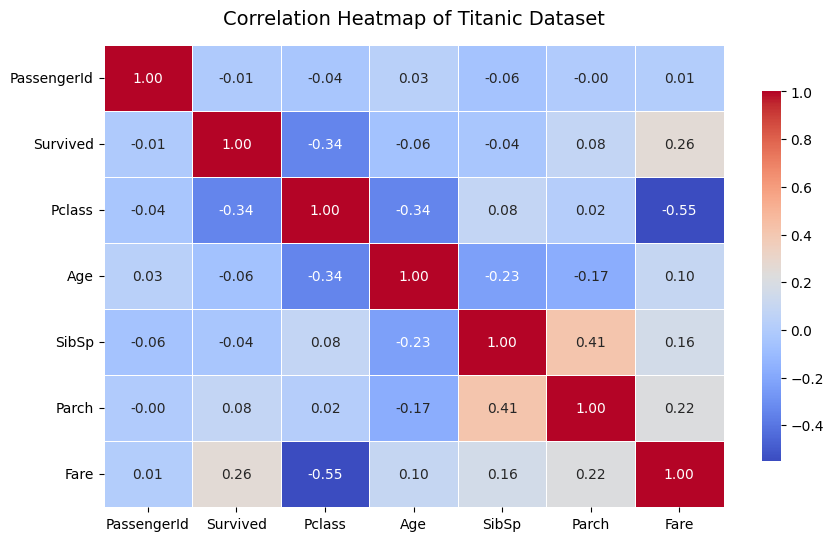

In [36]:
#HEATMAP OF CORRELATIONS
plt.figure(figsize=(10,6))

# Correlation matrix
corr = data.select_dtypes(include=['number']).corr()

# Heatmap with improvements
sns.heatmap(
    corr, 
    annot=True,        # values dikhana
    fmt=".2f",         # values ko 2 decimal tak round karega
    cmap="coolwarm",   # color scheme
    linewidths=0.5,    # cells ke beech thin lines
    cbar_kws={"shrink": 0.8}  # color bar thoda chhota
)

plt.title("Correlation Heatmap of Titanic Dataset", fontsize=14, pad=15)
plt.show()



INSIGHTS

In [37]:
#  Insights from the Correlation Heatmap:
# 1. Survived vs Pclass = -0.34  
#    → Negative correlation. Higher-class passengers (1st class) had better survival chances.  

# 2. Survived vs Fare = +0.26  
#    → Positive correlation. Passengers who paid higher fares (wealthier) had better chances of survival.  

# 3. Survived vs Age = -0.06  
#    → Almost no correlation. Age did not play a strong role in survival.  

# 4. Survived vs SibSp = -0.04 and Survived vs Parch = +0.08  
#    → Very weak correlation. Family size had little impact on survival.  

# 5. Pclass vs Fare = -0.55  
#    → Strong negative correlation. Higher Pclass = lower fare, and vice versa.  

# 6. SibSp vs Parch = +0.41  
#    → Positive correlation. Families traveling together often had both siblings/spouses and parents/children.  

#  Overall: Passenger class and fare show the strongest relationship with survival,
#             while age and family features (SibSp, Parch) show very weak relationships.
